In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tensorflow.keras.datasets import mnist


from sklearn.metrics import confusion_matrix

In [3]:
(X_train,y_train), (X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

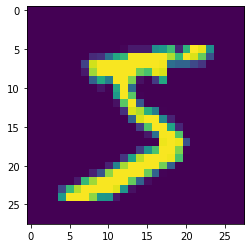

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
len(y_train)

60000

#### Finding the length of the output layer

In [8]:
labels = pd.DataFrame(y_train, columns =['label'])
labels

,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [9]:
labels['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [10]:
len(labels['label'].unique())

10

### Normalizing/scaling the data

In [15]:
X_train.min(), X_train.max()

(0, 255)

In [16]:
X_train_scaled=X_train/255
X_test_scaled= X_test/255

In [17]:
X_train_scaled[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

### Building the model

In [18]:
model_1= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax'),
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model_1.fit(X_train_scaled,y_train, epochs=100, validation_data=(X_test_scaled,y_test))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9282 - val_loss: 0.1314 - val_accuracy: 0.9609
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1032 - accuracy: 0.9681 - val_loss: 0.0890 - val_accuracy: 0.9728
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.0817 - val_accuracy: 0.9734
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9822 - val_loss: 0.0782 - val_accuracy: 0.9759
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9853 - val_loss: 0.0783 - val_accuracy: 0.9764
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0991 - val_accuracy: 0.9722
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0959 - val_ac

In [19]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 84.6335 - accuracy: 0.9796


[84.6335220336914, 0.9796000123023987]

### Improving the learning rate

In [21]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

lr_callback= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

history_2_lr=model_2.fit(X_train,y_train, epochs=25, validation_data=(X_test_scaled,y_test), callbacks=[lr_callback])

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6146 - accuracy: 0.8515 - val_loss: 2.2537 - val_accuracy: 0.0974 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3898 - accuracy: 0.9104 - val_loss: 2.2751 - val_accuracy: 0.0974 - lr: 0.0011
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3250 - accuracy: 0.9235 - val_loss: 2.2575 - val_accuracy: 0.0974 - lr: 0.0013
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2589 - accuracy: 0.9371 - val_loss: 2.2780 - val_accuracy: 0.0974 - lr: 0.0014
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2016 - accuracy: 0.9473 - val_loss: 2.2906 - val_accuracy: 0.0974 - lr: 0.0016
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1900 - accuracy: 0.9495 - val_loss: 2.2908 - val_accuracy: 0.1713 - lr: 0.0018
Epoch 7/25
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

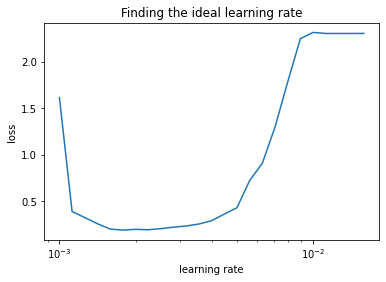

In [22]:
lrs=1e-3 *(10**(tf.range(25)/20))
plt.semilogx(lrs, history_2_lr.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

In [23]:
1e-3

0.001

### Rebuilding model with ideal learning rate

In [25]:
model_3= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax'),
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model_3.fit(X_train_scaled,y_train, epochs=25, validation_data=(X_test_scaled,y_test))

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2550 - accuracy: 0.9251 - val_loss: 0.1374 - val_accuracy: 0.9583
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1096 - accuracy: 0.9677 - val_loss: 0.1288 - val_accuracy: 0.9593
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0779 - accuracy: 0.9753 - val_loss: 0.0784 - val_accuracy: 0.9761
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0871 - val_accuracy: 0.9751
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0952 - val_accuracy: 0.9720
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9873 - val_loss: 0.0952 - val_accuracy: 0.9746
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0959 - val_accuracy:

In [26]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 39.6670 - accuracy: 0.9753


[39.66702651977539, 0.9753000140190125]

### Evaluating the model

#### Confusion Matrix

In [28]:
y_preds= model_3.predict(X_test_scaled)
y_preds

array([[1.0469150e-17, 8.9938171e-22, 1.2926045e-10, ..., 1.0000000e+00,
        2.8647879e-22, 2.0385481e-16],
       [2.5452983e-19, 1.3047714e-18, 1.0000000e+00, ..., 1.2330625e-27,
        5.7936628e-20, 3.7488097e-29],
       [3.7094567e-17, 1.0000000e+00, 9.4240082e-09, ..., 1.2303979e-09,
        8.9649488e-09, 4.4082655e-17],
       ...,
       [8.1731506e-27, 2.4697065e-21, 1.4352270e-25, ..., 1.3145748e-16,
        6.4826389e-18, 1.9434514e-14],
       [2.3818208e-25, 2.7571998e-26, 1.0114699e-25, ..., 1.8071147e-31,
        3.6824002e-10, 8.8832279e-32],
       [4.5596449e-33, 0.0000000e+00, 1.6630748e-35, ..., 0.0000000e+00,
        2.1171476e-28, 0.0000000e+00]], dtype=float32)

In [29]:
y_preds=y_preds.argmax(axis=1)
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

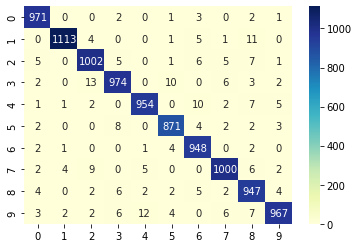

In [34]:
cm= confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")